In [31]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.loc[:, 'class'] = iris["target"]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


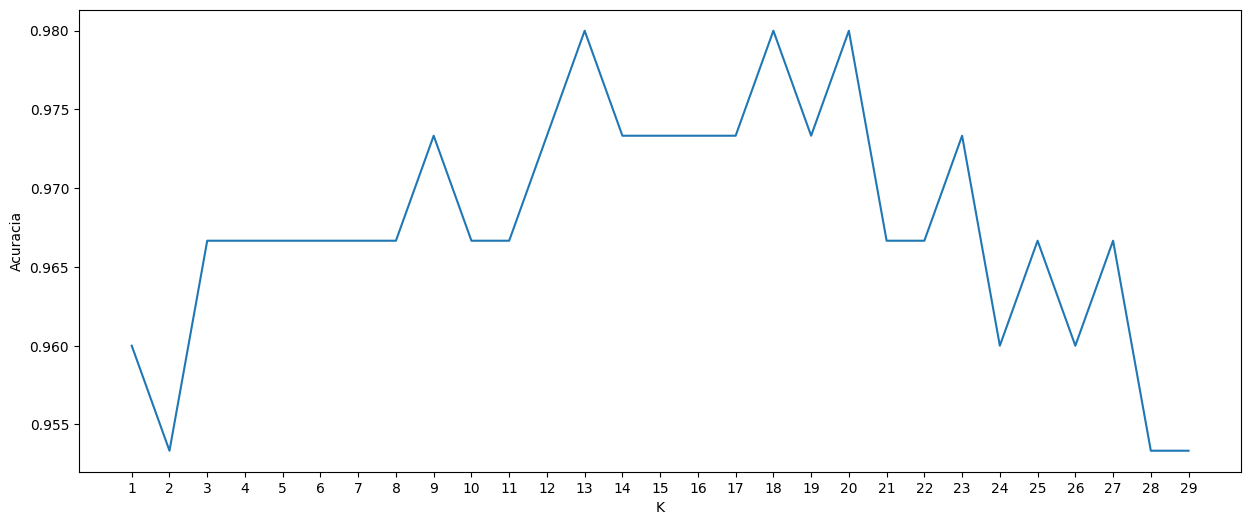

In [33]:
# Cross validation
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acuracias = []

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, iris.data, iris.target, cv=10)
    accuracy_score(iris.target, y_pred)
    acuracias.append(accuracy_score(iris.target, y_pred))

# Grafico de acuracias
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(range(1, 30), acuracias)
plt.xlabel('K')
plt.ylabel('Acuracia')
plt.xticks(range(1, 30, 1))
plt.show()


In [34]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(iris.data, iris.target)
knn.score(iris.data, iris.target)

0.98

## Normalização

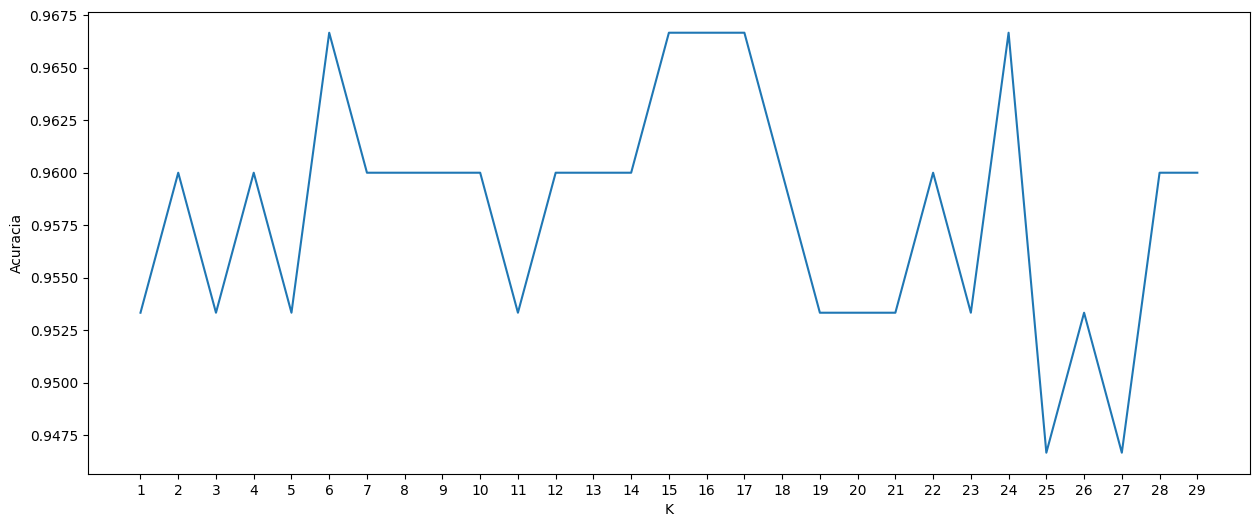

In [36]:
# Normalização do Iris
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris.data)
iris.data = scaler.transform(iris.data)

acuracias = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    y_pred = cross_val_predict(knn, iris.data, iris.target, cv=10)
    acuracias.append(accuracy_score(iris.target, y_pred))

plt.figure(figsize=(15, 6))
plt.plot(range(1, 30), acuracias)
plt.xlabel('K')
plt.ylabel('Acuracia')
plt.xticks(range(1, 30, 1))
plt.show()

# Desafio

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

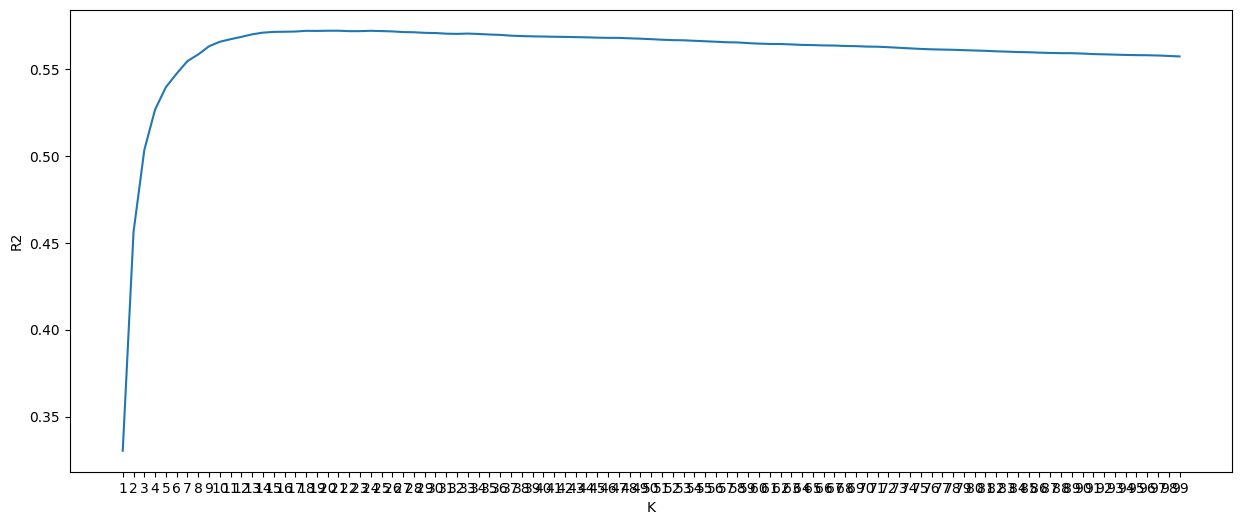

In [20]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

housing = fetch_california_housing()
housing.keys()

houseData = pd.DataFrame(housing.data, columns = housing.feature_names)
targetData = pd.DataFrame(housing.target)

# Normalização
scaler = MinMaxScaler()
scaler.fit(houseData)
houseData = scaler.transform(houseData)

range_k = range(1, 100)

# Regressão KNN
scores = []
for k in range_k:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, houseData, targetData, cv=10)
    scores.append(r2_score(targetData, y_pred))

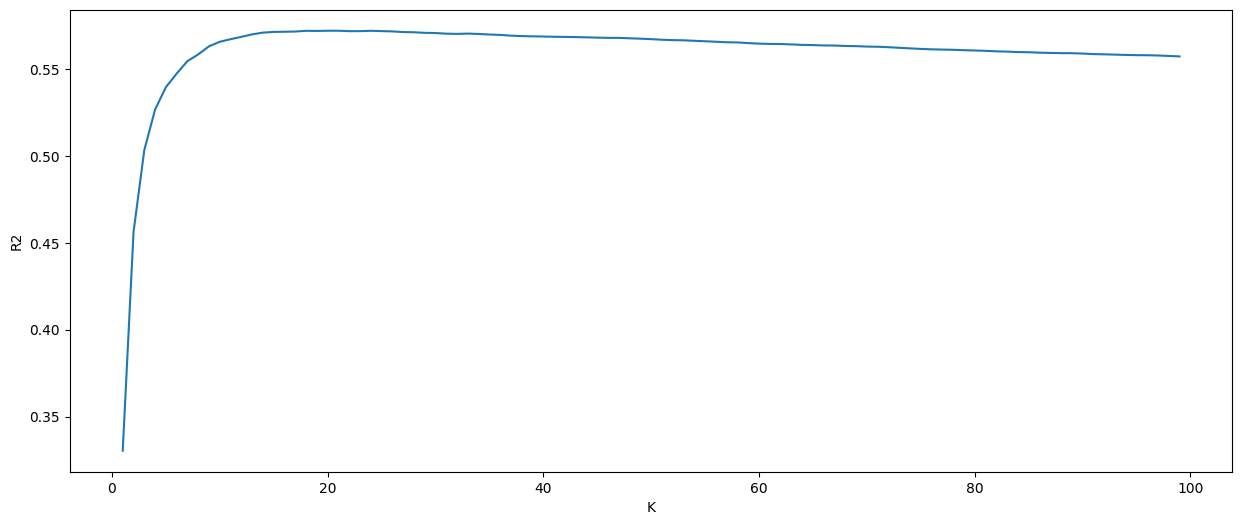

In [21]:
plt.figure(figsize=(15, 6))
plt.plot(range_k, scores)
plt.xlabel('K')
plt.ylabel('R2')
plt.show()

In [7]:
houseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
